In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import geopandas
import contextily as cx
from datetime import datetime
from shapely.geometry import Point, Polygon
from shapely import wkt

In [2]:
csv_path = Path("./segment_speeds.csv")
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,segment,speed,detection,obj_class,detection_ts,start_ts,end_ts,start_filename,end_filename
0,0,College Ave,14.4,True,fedex_truck,2021-10-04 14:17:12,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4
1,1,College Ave,14.4,True,fedex_truck,2021-10-04 14:17:13,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4
2,2,College Ave,14.4,True,fedex_truck,2021-10-04 14:17:14,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4
3,3,College Ave,14.4,True,amazon_truck,2021-10-04 14:17:23,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4
4,4,College Ave,14.4,True,fedex_truck,2021-10-04 14:17:25,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4


In [3]:
#df.describe

In [31]:
df['detection_ts'] = pd.to_datetime(df['detection_ts'])
df['start_ts'] = pd.to_datetime(df['start_ts'])
df['end_ts'] = pd.to_datetime(df['end_ts'])

def segment_tract(segment):
    #37.8675445661701, -122.26767205824014
    SH_Ax = -122.26767205824014
    SH_Ay = 37.8675445661701
    #37.86772242935123, -122.26769351591157
    SH_Bx = -122.26769351591157
    SH_By =     37.86772242935123
    #37.86866255617644, -122.2602155174144
    SH_Cx = -122.2602155174144
    SH_Cy = 37.86866255617644
    # 37.868543982282944, -122.25996875419285
    SH_Dx = -122.25996875419285
    SH_Dy = 37.868543982282944
    shattuck_segment = Polygon([(SH_Ax, SH_Ay), (SH_Bx, SH_By), (SH_Cx, SH_Cy), (SH_Dx, SH_Dy)])
    # 37.8691114413437, -122.256943222362
    BS_Cx = -122.256943222362
    BS_Cy = 37.8691114413437
    # 37.868942051040825, -122.256943222362
    BS_Dx = -122.256943222362
    BS_Dy = 37.868942051040825
    bus_segment = Polygon([(SH_Dx, SH_Dy), (SH_Cx, SH_Cy), (BS_Cx, BS_Cy), (BS_Dx, BS_Dy)])
    # 37.86937399554359, -122.25452923432489
    CA_Cx = -122.25452923432489
    CA_Cy = 37.86937399554359
    # 37.869238483815316, -122.25449704781772
    CA_Dx = -122.25449704781772
    CA_Dy = 37.869238483815316
    college_ave_segment = Polygon([(BS_Dx, BS_Dy), (BS_Cx, BS_Cy), (CA_Cx, CA_Cy), (CA_Dx, CA_Dy)])

    
    if segment == "College Ave":
        return college_ave_segment
    elif segment == "Bus Stop":
        return bus_segment
    elif segment == "Shattuck":
        return shattuck_segment

df['geometry'] = df['segment'].apply(segment_tract)

gdf = geopandas.GeoDataFrame(
    df, geometry=df['geometry'], crs=4326)
gdf['speed'].min()

0.5819861431870671

In [24]:
avg_speed_unfiltered = gdf.groupby(['segment', 'start_ts']).first()
print("Total average speed: " + str(avg_speed_unfiltered['speed'].mean()))
print("Unfiltered College Ave Speed: " + str(avg_speed_unfiltered.loc[('College Ave')]['speed'].mean()))
print("Unfiltered Bus Stop Speed: " + str(avg_speed_unfiltered.loc[('Bus Stop')]['speed'].mean()))
print("Unfiltered Shattuck Speed: " + str(avg_speed_unfiltered.loc[('Shattuck')]['speed'].mean()))

Total average speed: 12.864279701000264
Unfiltered College Ave Speed: 11.090186402240148
Unfiltered Bus Stop Speed: 16.278742685489703
Unfiltered Shattuck Speed: 14.542045580622386


In [25]:
avg_speed_no_det = gdf[gdf['detection'] == False]
avg_speed_no_det = avg_speed_no_det.groupby(['segment', 'start_ts']).first()

print("Total average speed: " + str(avg_speed_no_det['speed'].mean()))
print("Unfiltered College Ave Speed: " + str(avg_speed_no_det.loc[('College Ave')]['speed'].mean()))
print("Unfiltered Bus Stop Speed: " + str(avg_speed_no_det.loc[('Bus Stop')]['speed'].mean()))
print("Unfiltered Shattuck Speed: " + str(avg_speed_no_det.loc[('Shattuck')]['speed'].mean()))

Total average speed: 12.834104905334591
Unfiltered College Ave Speed: 11.485039207687409
Unfiltered Bus Stop Speed: 16.076974716678922
Unfiltered Shattuck Speed: 14.676379546440174


In [26]:
avg_speed_amazon = gdf[gdf['obj_class'] == 'amazon_truck']
avg_speed_amazon = avg_speed_amazon.groupby(['segment', 'start_ts']).first()

print("Total average speed: " + str(avg_speed_amazon['speed'].mean()))
print("Unfiltered College Ave Speed: " + str(avg_speed_amazon.loc[('College Ave')]['speed'].mean()))
print("Unfiltered Bus Stop Speed: " + str(avg_speed_amazon.loc[('Bus Stop')]['speed'].mean()))
print("Unfiltered Shattuck Speed: " + str(avg_speed_amazon.loc[('Shattuck')]['speed'].mean()))

Total average speed: 13.12425251609358
Unfiltered College Ave Speed: 9.97449135510549
Unfiltered Bus Stop Speed: 16.727998687177852
Unfiltered Shattuck Speed: 14.165446818675715


In [27]:
avg_speed_fedex = gdf[gdf['obj_class'] == 'fedex_truck']
avg_speed_fedex = avg_speed_fedex.groupby(['segment', 'start_ts']).first()

print("Total average speed: " + str(avg_speed_fedex['speed'].mean()))
print("Unfiltered College Ave Speed: " + str(avg_speed_fedex.loc[('College Ave')]['speed'].mean()))
print("Unfiltered Bus Stop Speed: " + str(avg_speed_fedex.loc[('Bus Stop')]['speed'].mean()))
print("Unfiltered Shattuck Speed: " + str(avg_speed_fedex.loc[('Shattuck')]['speed'].mean()))

Total average speed: 12.603224904792553
Unfiltered College Ave Speed: 10.393369815552028
Unfiltered Bus Stop Speed: 16.58784654075675
Unfiltered Shattuck Speed: 14.654031297472207


In [28]:
avg_speed_ups = gdf[gdf['obj_class'] == 'ups_truck']
avg_speed_ups = avg_speed_ups.groupby(['segment', 'start_ts']).first()

print("Total average speed: " + str(avg_speed_ups['speed'].mean()))
print("Unfiltered College Ave Speed: " + str(avg_speed_ups.loc[('College Ave')]['speed'].mean()))
print("Unfiltered Bus Stop Speed: " + str(avg_speed_ups.loc[('Bus Stop')]['speed'].mean()))
print("Unfiltered Shattuck Speed: " + str(avg_speed_ups.loc[('Shattuck')]['speed'].mean()))

Total average speed: 12.462437932350404
Unfiltered College Ave Speed: 10.4921164063124
Unfiltered Bus Stop Speed: 15.1268653277144
Unfiltered Shattuck Speed: 13.73279355235846


AttributeError: 'Series' object has no attribute 'axis'

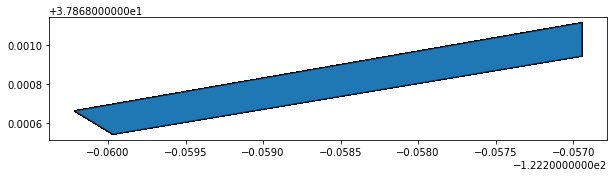

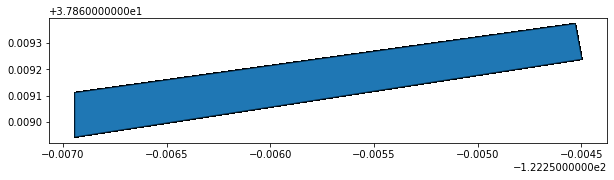

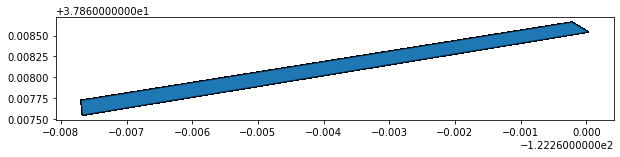

In [29]:
grouped_df = gdf.groupby(['segment'])
ax = grouped_df.plot(figsize=(10, 10), alpha=0.1, edgecolor='k')
cx.add_basemap(ax, crs=gdf.crs.to_string())

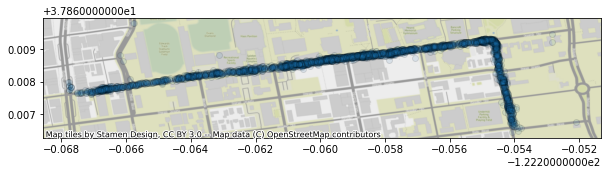

In [4]:
# Base Projection
ax = gdf.plot(figsize=(10, 10), alpha=0.1, edgecolor='k')
cx.add_basemap(ax, crs=gdf.crs.to_string())

In [22]:
gdf['latitude'].min(), gdf['latitude'].max(), gdf['longitude'].min(), gdf['longitude'].max()

(37.86649166666667, 37.86935, -122.26779722222224, -122.25371944444444)

In [23]:
(gdf['longitude'].max() - gdf['longitude'].min())/15, (gdf['latitude'].max() - gdf['latitude'].min())/15

(0.0009385185185199892, 0.0001905555555552496)

In [5]:
#heatmap = geopandas.GeoDataFrame()
def rect_tract(point):
    x = point.x
    y = point.y
    min_lat = 37.86649166666667
    lat_incr = 0.0001905555555552496
    min_long = -122.26779722222224
    long_incr = 0.0009385185185199892
    x0 = int((x - min_lat)/lat_incr) * lat_incr + min_lat
    y0 = int((y - min_long)/long_incr) * long_incr + min_long
    return Polygon([(x0, y0), (x0+lat_incr, y0), (x0+lat_incr, y0+long_incr), (x0, y0+long_incr)])

gdf = gdf[gdf['obj_class_name'] == 'ups_truck']

gdf['tract'] = gdf['geometry'].apply(rect_tract)
gdf['str_tract'] = gdf['tract'].apply(lambda x: wkt.dumps(x))
gdf.head()
    ## 100 - 200, 10, 153 - 150: 153-100 (53)/10 (5)

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,geometry,tract,str_tract
6,2021-10-04 14:16:58,37.869214,-122.254575,9.656,GRMN2710.MP4,GRMN2710_1.jpg,ups_truck,5,0.499479,0.603704,0.069792,0.144444,0.321531,POINT (-122.25458 37.86921),"POLYGON ((-122.25448 37.86880, -122.25429 37.8...",POLYGON ((-122.2544833330762515 37.86880203728...
7,2021-10-04 14:16:58,37.869214,-122.254575,9.656,GRMN2710.MP4,GRMN2710_10.jpg,ups_truck,5,0.507031,0.600926,0.075521,0.146296,0.374073,POINT (-122.25458 37.86921),"POLYGON ((-122.25448 37.86880, -122.25429 37.8...",POLYGON ((-122.2544833330762515 37.86880203728...
8,2021-10-04 14:16:58,37.869214,-122.254575,9.656,GRMN2710.MP4,GRMN2710_11.jpg,ups_truck,5,0.510938,0.603241,0.067708,0.149074,0.303685,POINT (-122.25458 37.86921),"POLYGON ((-122.25448 37.86880, -122.25429 37.8...",POLYGON ((-122.2544833330762515 37.86880203728...
9,2021-10-04 14:16:58,37.869214,-122.254575,9.656,GRMN2710.MP4,GRMN2710_13.jpg,ups_truck,5,0.512760,0.600926,0.074479,0.144444,0.429328,POINT (-122.25458 37.86921),"POLYGON ((-122.25448 37.86880, -122.25429 37.8...",POLYGON ((-122.2544833330762515 37.86880203728...
10,2021-10-04 14:16:58,37.869214,-122.254575,9.656,GRMN2710.MP4,GRMN2710_17.jpg,ups_truck,5,0.513542,0.602778,0.077083,0.151852,0.529567,POINT (-122.25458 37.86921),"POLYGON ((-122.25448 37.86880, -122.25429 37.8...",POLYGON ((-122.2544833330762515 37.86880203728...


In [50]:
def poly_tract(point):
    x = point.x
    y = point.y
    Ax = -122.26774689730816
    Ay = 37.86751146476282
    Bx = -122.25229737292143
    By = 37.86947640648476
    Cx = -122.25229737292143
    Cy = 37.86971355107992
    Dx = -122.26775936544256
    Dy = 37.86781110107592
    bancroft_box = Polygon([(Ax, Ay), (Bx, By), (Cx, Cy), (Dx, Dy)])
    banc_divisions = 30
    
    m_upper = (Cy - Ay)/(Cx - Ax)
    m_lower = (By- Ay)/(Bx - Ax)
    m_pt = (y - Ay)/(x - Ax)
    
    if bancroft_box.contains(point):
        x_incr = (Bx-Ax)/banc_divisions
        tract_x1 = ((x - Ax) // x_incr) * x_incr + Ax
        tract_y1 = (tract_x1 - Ax) * m_lower + Ay
        tract_y2 = tract_y1 + 0.00025899403 # street width const
        y_incr = x_incr * m_lower
        return Polygon ( [(tract_x1, tract_y1), (tract_x1 + x_incr, tract_y1 + y_incr),\
                          (tract_x1 + x_incr, tract_y2 + y_incr), (tract_x1, tract_y2 )] )
    
    upper_shattuck = Polygon([(-122.26784797975396, 37.86766711671221), (-122.26809474297552, 37.86937797047834),\
                             (-122.26777631838243, 37.86938643995261), (-122.26759392817519, 37.8677856920168)])
    if upper_shattuck.contains(point):
        return upper_shattuck
    
    college_ave = Polygon([(-122.25467372747126, 37.86922763715602), (-122.25433693481585, 37.86925304562779),\
                           (-122.25398556544024, 37.86754218895033), (-122.25431431146889, 37.86752524957682)])
    if college_ave.contains(point):
        return college_ave
    
    return Point(x, y)

#gdf = gdf[gdf['obj_class_name'] == 'ups_truck']

gdf['tract'] = gdf['geometry'].apply(poly_tract)
gdf['str_tract'] = gdf['tract'].apply(lambda x: wkt.dumps(x))
trunc_gdf = gdf[gdf['obj_class_name'] !='bus']
trunc_gdf.head()

,Unnamed: 0,Unnamed: 0.1,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,...,h,confidences,date,month,day of week,box area,should_keep,geometry,tract,str_tract
0,76,118,2021-10-04 14:17:14,37.869228,-122.255411,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_492.jpg,fedex_truck,4,...,0.217593,0.867439,2021-10-04 14:17:14,10,0,0.031959,True,POINT (-122.25541 37.86923),"POLYGON ((-122.25590 37.86902, -122.25539 37.8...",POLYGON ((-122.2559022619449962 37.86901792008...
1,134,236,2021-10-04 14:17:25,37.869117,-122.256217,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_827.jpg,fedex_truck,4,...,0.452778,0.862031,2021-10-04 14:17:25,10,0,0.151398,True,POINT (-122.25622 37.86912),"POLYGON ((-122.25642 37.86895, -122.25590 37.8...",POLYGON ((-122.2564172460912317 37.86895242202...
3,2021,2760,2021-11-15 16:25:26,37.868431,-122.261094,24.1401,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_900.jpg,fedex_truck,4,...,0.476852,0.897188,2021-11-15 16:25:26,11,0,0.078979,True,POINT (-122.26109 37.86843),"POLYGON ((-122.26157 37.86830, -122.26105 37.8...",POLYGON ((-122.2615670875534732 37.86829744145...
4,2501,4811,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1777.jpg,amazon_truck,6,...,0.307407,0.856841,2021-11-15 16:52:56,11,0,0.081015,True,POINT (-122.26067 37.86857),"POLYGON ((-122.26105 37.86836, -122.26054 37.8...",POLYGON ((-122.2610521034072377 37.86836293950...
6,2551,4919,2021-11-15 16:53:32,37.868500,-122.261575,17.7027,GRMN_Bancroft_1009.MP4,GRMN_Bancroft_1009_1020.jpg,fedex_truck,4,...,0.201852,0.851063,2021-11-15 16:53:32,11,0,0.018924,True,POINT (-122.26157 37.86850),"POLYGON ((-122.26208 37.86823, -122.26157 37.8...",POLYGON ((-122.2620820716996946 37.86823194339...


In [51]:
trunc_gdf = trunc_gdf[trunc_gdf['str_tract'].str.startswith('POLYGON')]
trunc_gdf.head()

,Unnamed: 0,Unnamed: 0.1,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,...,h,confidences,date,month,day of week,box area,should_keep,geometry,tract,str_tract
0,76,118,2021-10-04 14:17:14,37.869228,-122.255411,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_492.jpg,fedex_truck,4,...,0.217593,0.867439,2021-10-04 14:17:14,10,0,0.031959,True,POINT (-122.25541 37.86923),"POLYGON ((-122.25590 37.86902, -122.25539 37.8...",POLYGON ((-122.2559022619449962 37.86901792008...
1,134,236,2021-10-04 14:17:25,37.869117,-122.256217,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_827.jpg,fedex_truck,4,...,0.452778,0.862031,2021-10-04 14:17:25,10,0,0.151398,True,POINT (-122.25622 37.86912),"POLYGON ((-122.25642 37.86895, -122.25590 37.8...",POLYGON ((-122.2564172460912317 37.86895242202...
3,2021,2760,2021-11-15 16:25:26,37.868431,-122.261094,24.1401,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_900.jpg,fedex_truck,4,...,0.476852,0.897188,2021-11-15 16:25:26,11,0,0.078979,True,POINT (-122.26109 37.86843),"POLYGON ((-122.26157 37.86830, -122.26105 37.8...",POLYGON ((-122.2615670875534732 37.86829744145...
4,2501,4811,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1777.jpg,amazon_truck,6,...,0.307407,0.856841,2021-11-15 16:52:56,11,0,0.081015,True,POINT (-122.26067 37.86857),"POLYGON ((-122.26105 37.86836, -122.26054 37.8...",POLYGON ((-122.2610521034072377 37.86836293950...
6,2551,4919,2021-11-15 16:53:32,37.868500,-122.261575,17.7027,GRMN_Bancroft_1009.MP4,GRMN_Bancroft_1009_1020.jpg,fedex_truck,4,...,0.201852,0.851063,2021-11-15 16:53:32,11,0,0.018924,True,POINT (-122.26157 37.86850),"POLYGON ((-122.26208 37.86823, -122.26157 37.8...",POLYGON ((-122.2620820716996946 37.86823194339...


In [52]:
grouped_tract = trunc_gdf.groupby(trunc_gdf['str_tract']).agg({'confidences' : ['mean'], 'tract' : ['first'], 'x' : ['count']}).reset_index()

In [53]:
agg_data_df = geopandas.GeoDataFrame()
agg_data_df['avg_confidence'] = grouped_tract['confidences']
agg_data_df['geometry'] = grouped_tract['tract']
agg_data_df['count'] = grouped_tract['x']
agg_data_df.crs=4326
agg_data_df

#agg_data_df = agg_data_df[agg_data_df['count'] < 500]

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


,avg_confidence,geometry,count
0,0.874210,POLYGON ((-122.25467372747126 37.8692276371560...,122
1,0.886208,POLYGON ((-122.25487229365255 37.8691489161977...,70
2,0.874312,POLYGON ((-122.25538727779877 37.8690834181403...,57
3,0.878752,POLYGON ((-122.255902261945 37.869017920082975...,41
4,0.885406,POLYGON ((-122.25641724609123 37.8689524220255...,61
5,0.888758,POLYGON ((-122.25693223023745 37.8688869239681...,24
6,0.886527,POLYGON ((-122.25744721438367 37.8688214259107...,52
7,0.887371,POLYGON ((-122.2579621985299 37.86875592785338...,164
8,0.879092,POLYGON ((-122.25847718267612 37.8686904297959...,92
9,0.881771,POLYGON ((-122.25899216682235 37.8686249317385...,106


/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 19 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


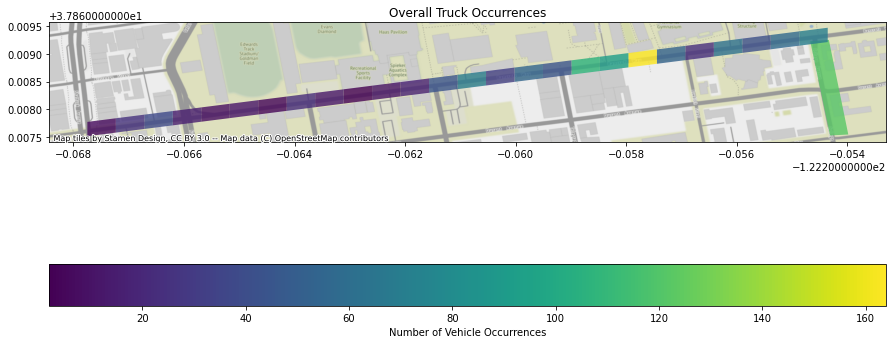

In [54]:
temp_df = agg_data_df[agg_data_df['count'] > 1]
ax = temp_df.plot(column='count',figsize = (15,15),alpha = 0.8, legend = True, legend_kwds={'label': "Number of Vehicle Occurrences",
                        'orientation': "horizontal"})
plt.title("Overall Truck Occurrences")
cx.add_basemap(ax,crs = gdf.crs.to_string())

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 19 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


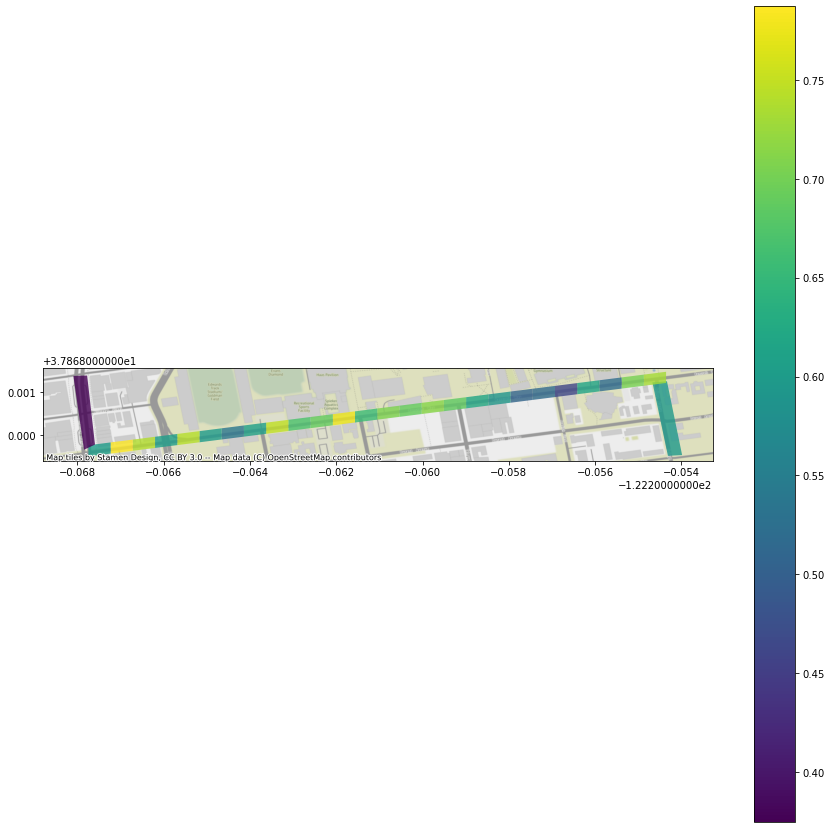

In [29]:
ax = agg_data_df.plot(column='avg_confidence',figsize = (15,15),alpha = 0.8, legend = True);
cx.add_basemap(ax,crs = agg_data_df.crs.to_string())

In [7]:
gdf['obj_class_name'].value_counts()

bus             124190
fedex_truck      13278
ups_truck         8553
amazon_truck      2277
Name: obj_class_name, dtype: int64

In [8]:
# Fedex
gdf_fedex = gdf[gdf['obj_class_name'] == 'fedex_truck']
gdf_fedex.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,geometry
30,2021-10-04 14:17:11,37.86925,122.255208,20.9214,GRMN2710.MP4,GRMN2710_408.jpg,fedex_truck,4,0.591927,0.602778,0.053646,0.087037,0.500418,POINT (122.255 37.869)
31,2021-10-04 14:17:11,37.86925,122.255208,20.9214,GRMN2710.MP4,GRMN2710_413.jpg,fedex_truck,4,0.594010,0.603704,0.053646,0.088889,0.256181,POINT (122.255 37.869)
32,2021-10-04 14:17:11,37.86925,122.255208,20.9214,GRMN2710.MP4,GRMN2710_414.jpg,fedex_truck,4,0.594531,0.603241,0.051562,0.084259,0.346707,POINT (122.255 37.869)
33,2021-10-04 14:17:11,37.86925,122.255208,20.9214,GRMN2710.MP4,GRMN2710_418.jpg,fedex_truck,4,0.596094,0.604630,0.055729,0.088889,0.707333,POINT (122.255 37.869)
34,2021-10-04 14:17:11,37.86925,122.255208,20.9214,GRMN2710.MP4,GRMN2710_419.jpg,fedex_truck,4,0.595573,0.606944,0.053646,0.089815,0.495142,POINT (122.255 37.869)


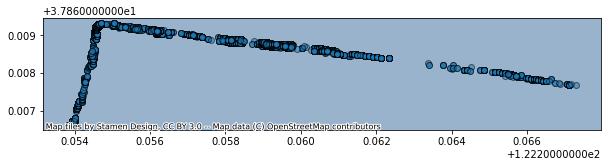

In [9]:
ax2 = gdf_fedex.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax2, crs=gdf_fedex.crs.to_string(), zoom=15)

In [10]:
# UPS
gdf_UPS = gdf[gdf['obj_class_name'] == 'ups_truck']
gdf_UPS.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,geometry
6,2021-10-04 14:16:58,37.869214,122.254575,9.656,GRMN2710.MP4,GRMN2710_1.jpg,ups_truck,5,0.499479,0.603704,0.069792,0.144444,0.321531,POINT (122.255 37.869)
7,2021-10-04 14:16:58,37.869214,122.254575,9.656,GRMN2710.MP4,GRMN2710_10.jpg,ups_truck,5,0.507031,0.600926,0.075521,0.146296,0.374073,POINT (122.255 37.869)
8,2021-10-04 14:16:58,37.869214,122.254575,9.656,GRMN2710.MP4,GRMN2710_11.jpg,ups_truck,5,0.510938,0.603241,0.067708,0.149074,0.303685,POINT (122.255 37.869)
9,2021-10-04 14:16:58,37.869214,122.254575,9.656,GRMN2710.MP4,GRMN2710_13.jpg,ups_truck,5,0.512760,0.600926,0.074479,0.144444,0.429328,POINT (122.255 37.869)
10,2021-10-04 14:16:58,37.869214,122.254575,9.656,GRMN2710.MP4,GRMN2710_17.jpg,ups_truck,5,0.513542,0.602778,0.077083,0.151852,0.529567,POINT (122.255 37.869)


/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 35 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


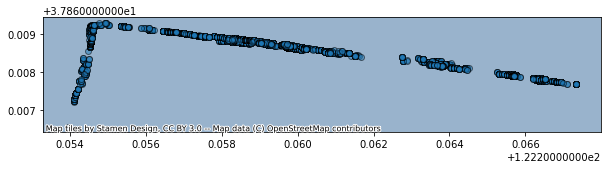

In [11]:
ax3 = gdf_UPS.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax3, crs=gdf_UPS.crs.to_string())

In [12]:
# Amazon
gdf_amazon = gdf[gdf['obj_class_name'] == 'amazon_truck']
gdf_amazon.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,geometry
205,2021-10-04 14:17:22,37.869153,122.255989,22.5308,GRMN2710.MP4,GRMN2710_744.jpg,amazon_truck,6,0.134115,0.587963,0.268229,0.553704,0.380644,POINT (122.256 37.869)
206,2021-10-04 14:17:22,37.869153,122.255989,22.5308,GRMN2710.MP4,GRMN2710_745.jpg,amazon_truck,6,0.131510,0.573148,0.263021,0.568519,0.432717,POINT (122.256 37.869)
207,2021-10-04 14:17:22,37.869153,122.255989,22.5308,GRMN2710.MP4,GRMN2710_746.jpg,amazon_truck,6,0.128385,0.583333,0.256771,0.538889,0.570676,POINT (122.256 37.869)
208,2021-10-04 14:17:22,37.869153,122.255989,22.5308,GRMN2710.MP4,GRMN2710_748.jpg,amazon_truck,6,0.120052,0.619444,0.235938,0.470370,0.262157,POINT (122.256 37.869)
209,2021-10-04 14:17:22,37.869153,122.255989,22.5308,GRMN2710.MP4,GRMN2710_749.jpg,amazon_truck,6,0.116146,0.590741,0.227083,0.505556,0.412988,POINT (122.256 37.869)


/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 35 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


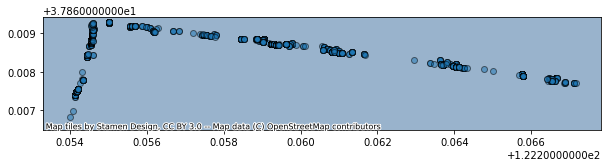

In [13]:
ax4 = gdf_amazon.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax4, crs=gdf_amazon.crs.to_string())

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


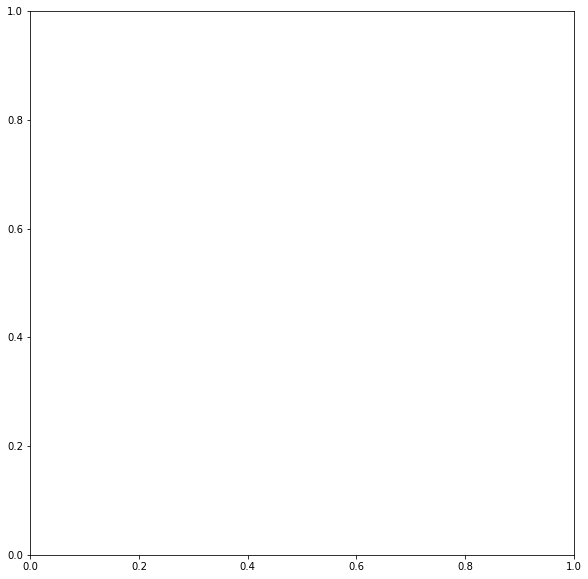

In [18]:
gdf_amazon_oct = gdf_amazon[gdf_amazon['time'].dt.month == 11]
ax5 = gdf_amazon_oct.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax4, crs=gdf_amazon_oct.crs.to_string(), zoom=15)
